# Australian RealState Pricing Prediction

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

  - Which variables are significant in predicting the price of a house, and
  - How well those variables describe the price of a house.
  - Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goals
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps taken for analysis

- Reading, understanding and visualising the dataset
- Preparing the data for modelling (train-test split, rescalling etc)
- Training the model using ridge and lasso regression
- Predictions and evaluation on the test set

In [1]:
import numpy as np
import pandas as pd
import os

#for graph visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE

#for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

#for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and analysing data

In [2]:
data = pd.read_csv("train.csv")

### data quality 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Some missing values

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.shape

(1460, 81)

In [6]:
#count null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
#count unique values
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

### Calculate missing & unique value percentage per column 

In [8]:
pd.set_option('display.max_rows', 100)
#calculate missing value percentage 
mvp = lambda df, col: (df[col].isnull().sum())/len(df)
#calculate unique value percentage
uniq_per = lambda df, col: len(df[col].unique())/len(df)

In [9]:
col_info = pd.DataFrame([{'name': x, 
                                  'dtype': str(data[x].dtype), 
                                  'NaN_%': mvp(data,x),
                                  'Unique_%': uniq_per(data, x)}
                         for x in data.columns])

In [10]:
col_info

,name,dtype,NaN_%,Unique_%
0,Id,int64,0.000000,1.000000
1,MSSubClass,int64,0.000000,0.010274
2,MSZoning,object,0.000000,0.003425
3,LotFrontage,float64,0.177397,0.076027
4,LotArea,int64,0.000000,0.734932
5,Street,object,0.000000,0.001370
6,Alley,object,0.937671,0.002055
7,LotShape,object,0.000000,0.002740
8,LandContour,object,0.000000,0.002740
9,Utilities,object,0.000000,0.001370


### Segregate numeric & categorical columns

In [11]:
#numerical columns
num_columns = col_info[col_info['dtype'].isin(['float64','float', 'int64'])].sort_values('NaN_%', ascending=False)
#Categorical columns
cat_columns = col_info[col_info['dtype'].isin(['object'])].sort_values('NaN_%', ascending=False)

In [12]:
print("No of Numerical Column", len(num_columns))
num_columns

No of Numerical Column 38


,name,dtype,NaN_%,Unique_%
3,LotFrontage,float64,0.177397,0.076027
59,GarageYrBlt,float64,0.055479,0.067123
26,MasVnrArea,float64,0.005479,0.224658
0,Id,int64,0.000000,1.000000
67,OpenPorchSF,int64,0.000000,0.138356
52,KitchenAbvGr,int64,0.000000,0.002740
54,TotRmsAbvGrd,int64,0.000000,0.008219
56,Fireplaces,int64,0.000000,0.002740
61,GarageCars,int64,0.000000,0.003425
62,GarageArea,int64,0.000000,0.302055


In [13]:
print("No of Categorical Column", len(cat_columns))
cat_columns

No of Categorical Column 43


,name,dtype,NaN_%,Unique_%
72,PoolQC,object,0.995205,0.002740
74,MiscFeature,object,0.963014,0.003425
6,Alley,object,0.937671,0.002055
73,Fence,object,0.807534,0.003425
57,FireplaceQu,object,0.472603,0.004110
58,GarageType,object,0.055479,0.004795
64,GarageCond,object,0.055479,0.004110
63,GarageQual,object,0.055479,0.004110
60,GarageFinish,object,0.055479,0.002740
35,BsmtFinType2,object,0.026027,0.004795


## visualize categorical data

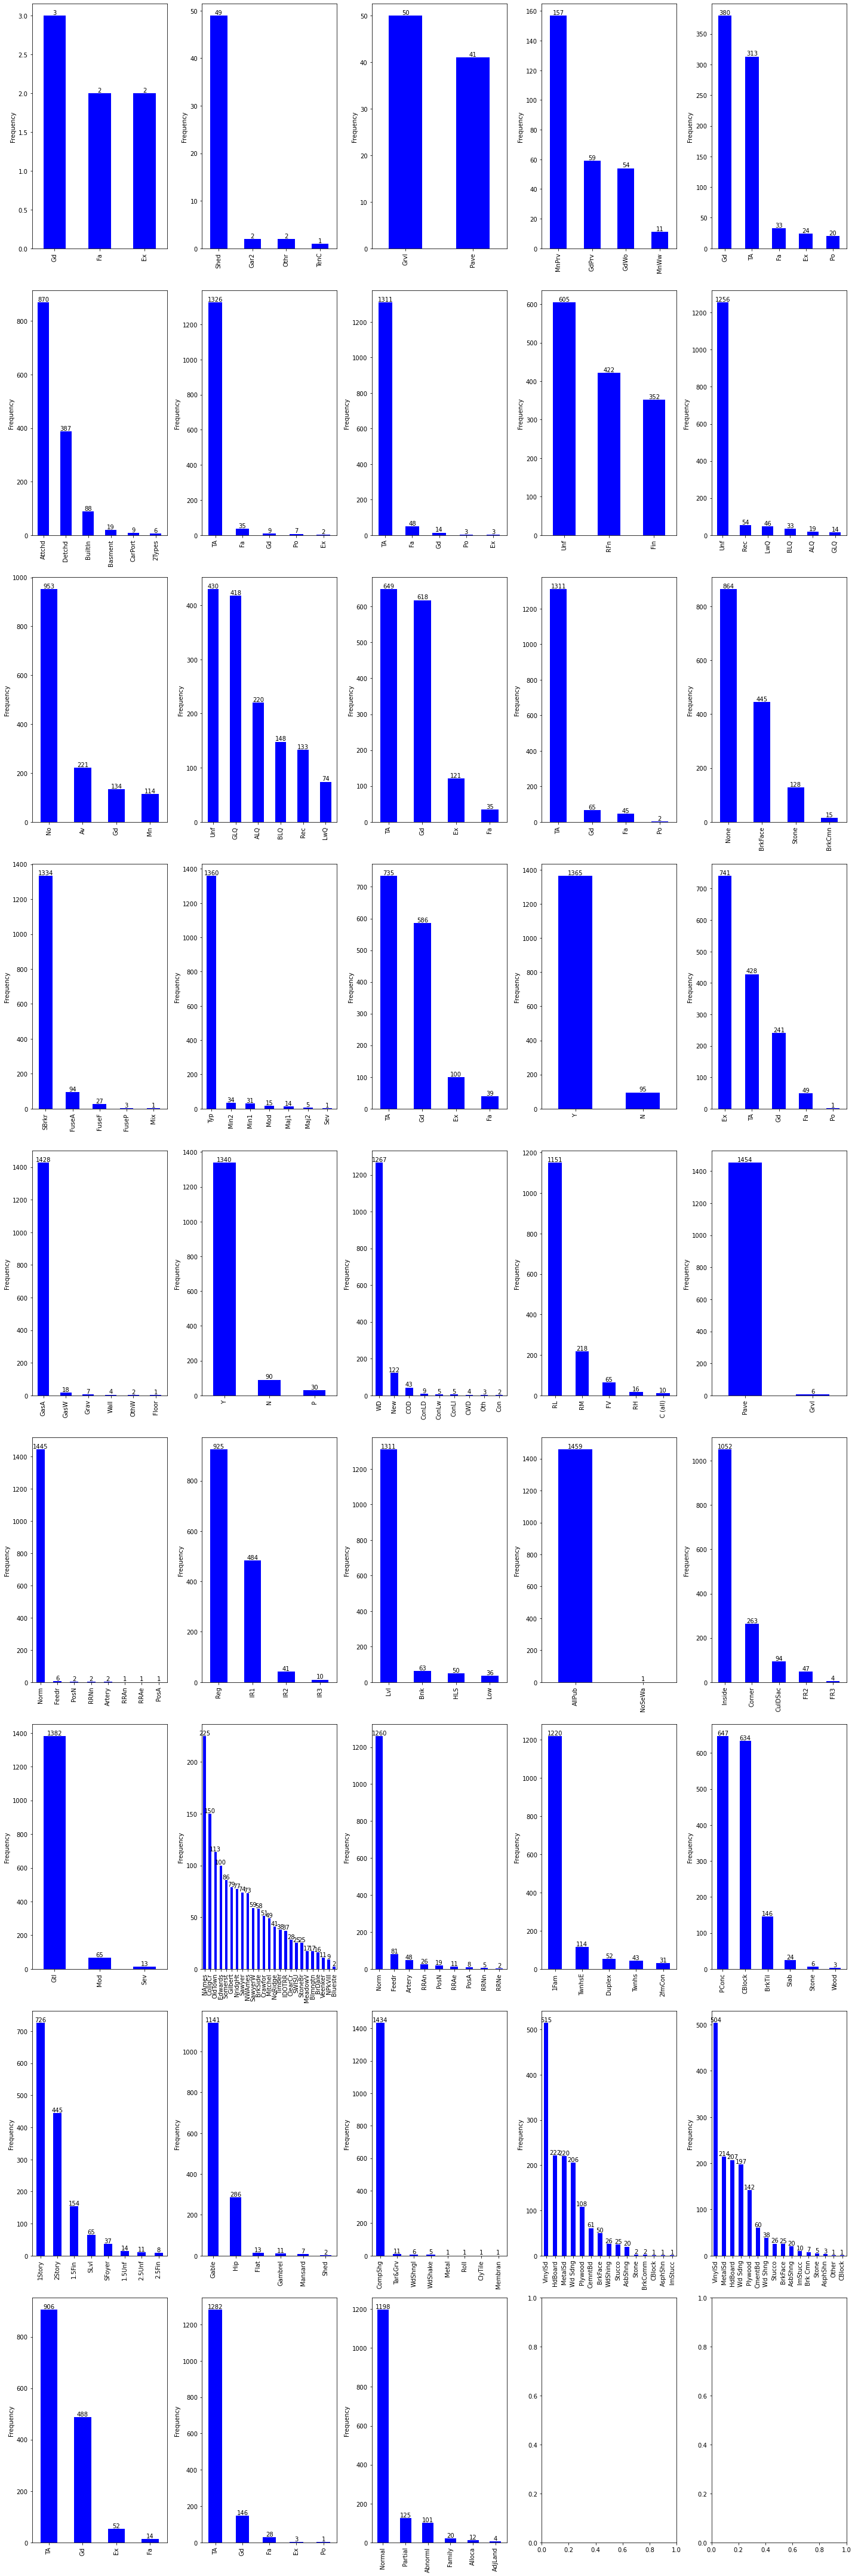

In [14]:
# Calculate the number of rows and columns for subplots
num_cols = 5
num_rows = round(len(cat_columns['name'].unique()) // num_cols) + 1 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60)) 

# generate histograms graphs for each categorical column
for i, column in enumerate(cat_columns['name'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    data[column].value_counts().plot(kind='bar', ax=ax, color='blue')
    ax.set_ylabel('Frequency')
    for j, count in enumerate(data[column].value_counts()):
        ax.text(j, count, str(count), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

## visualize numerical data

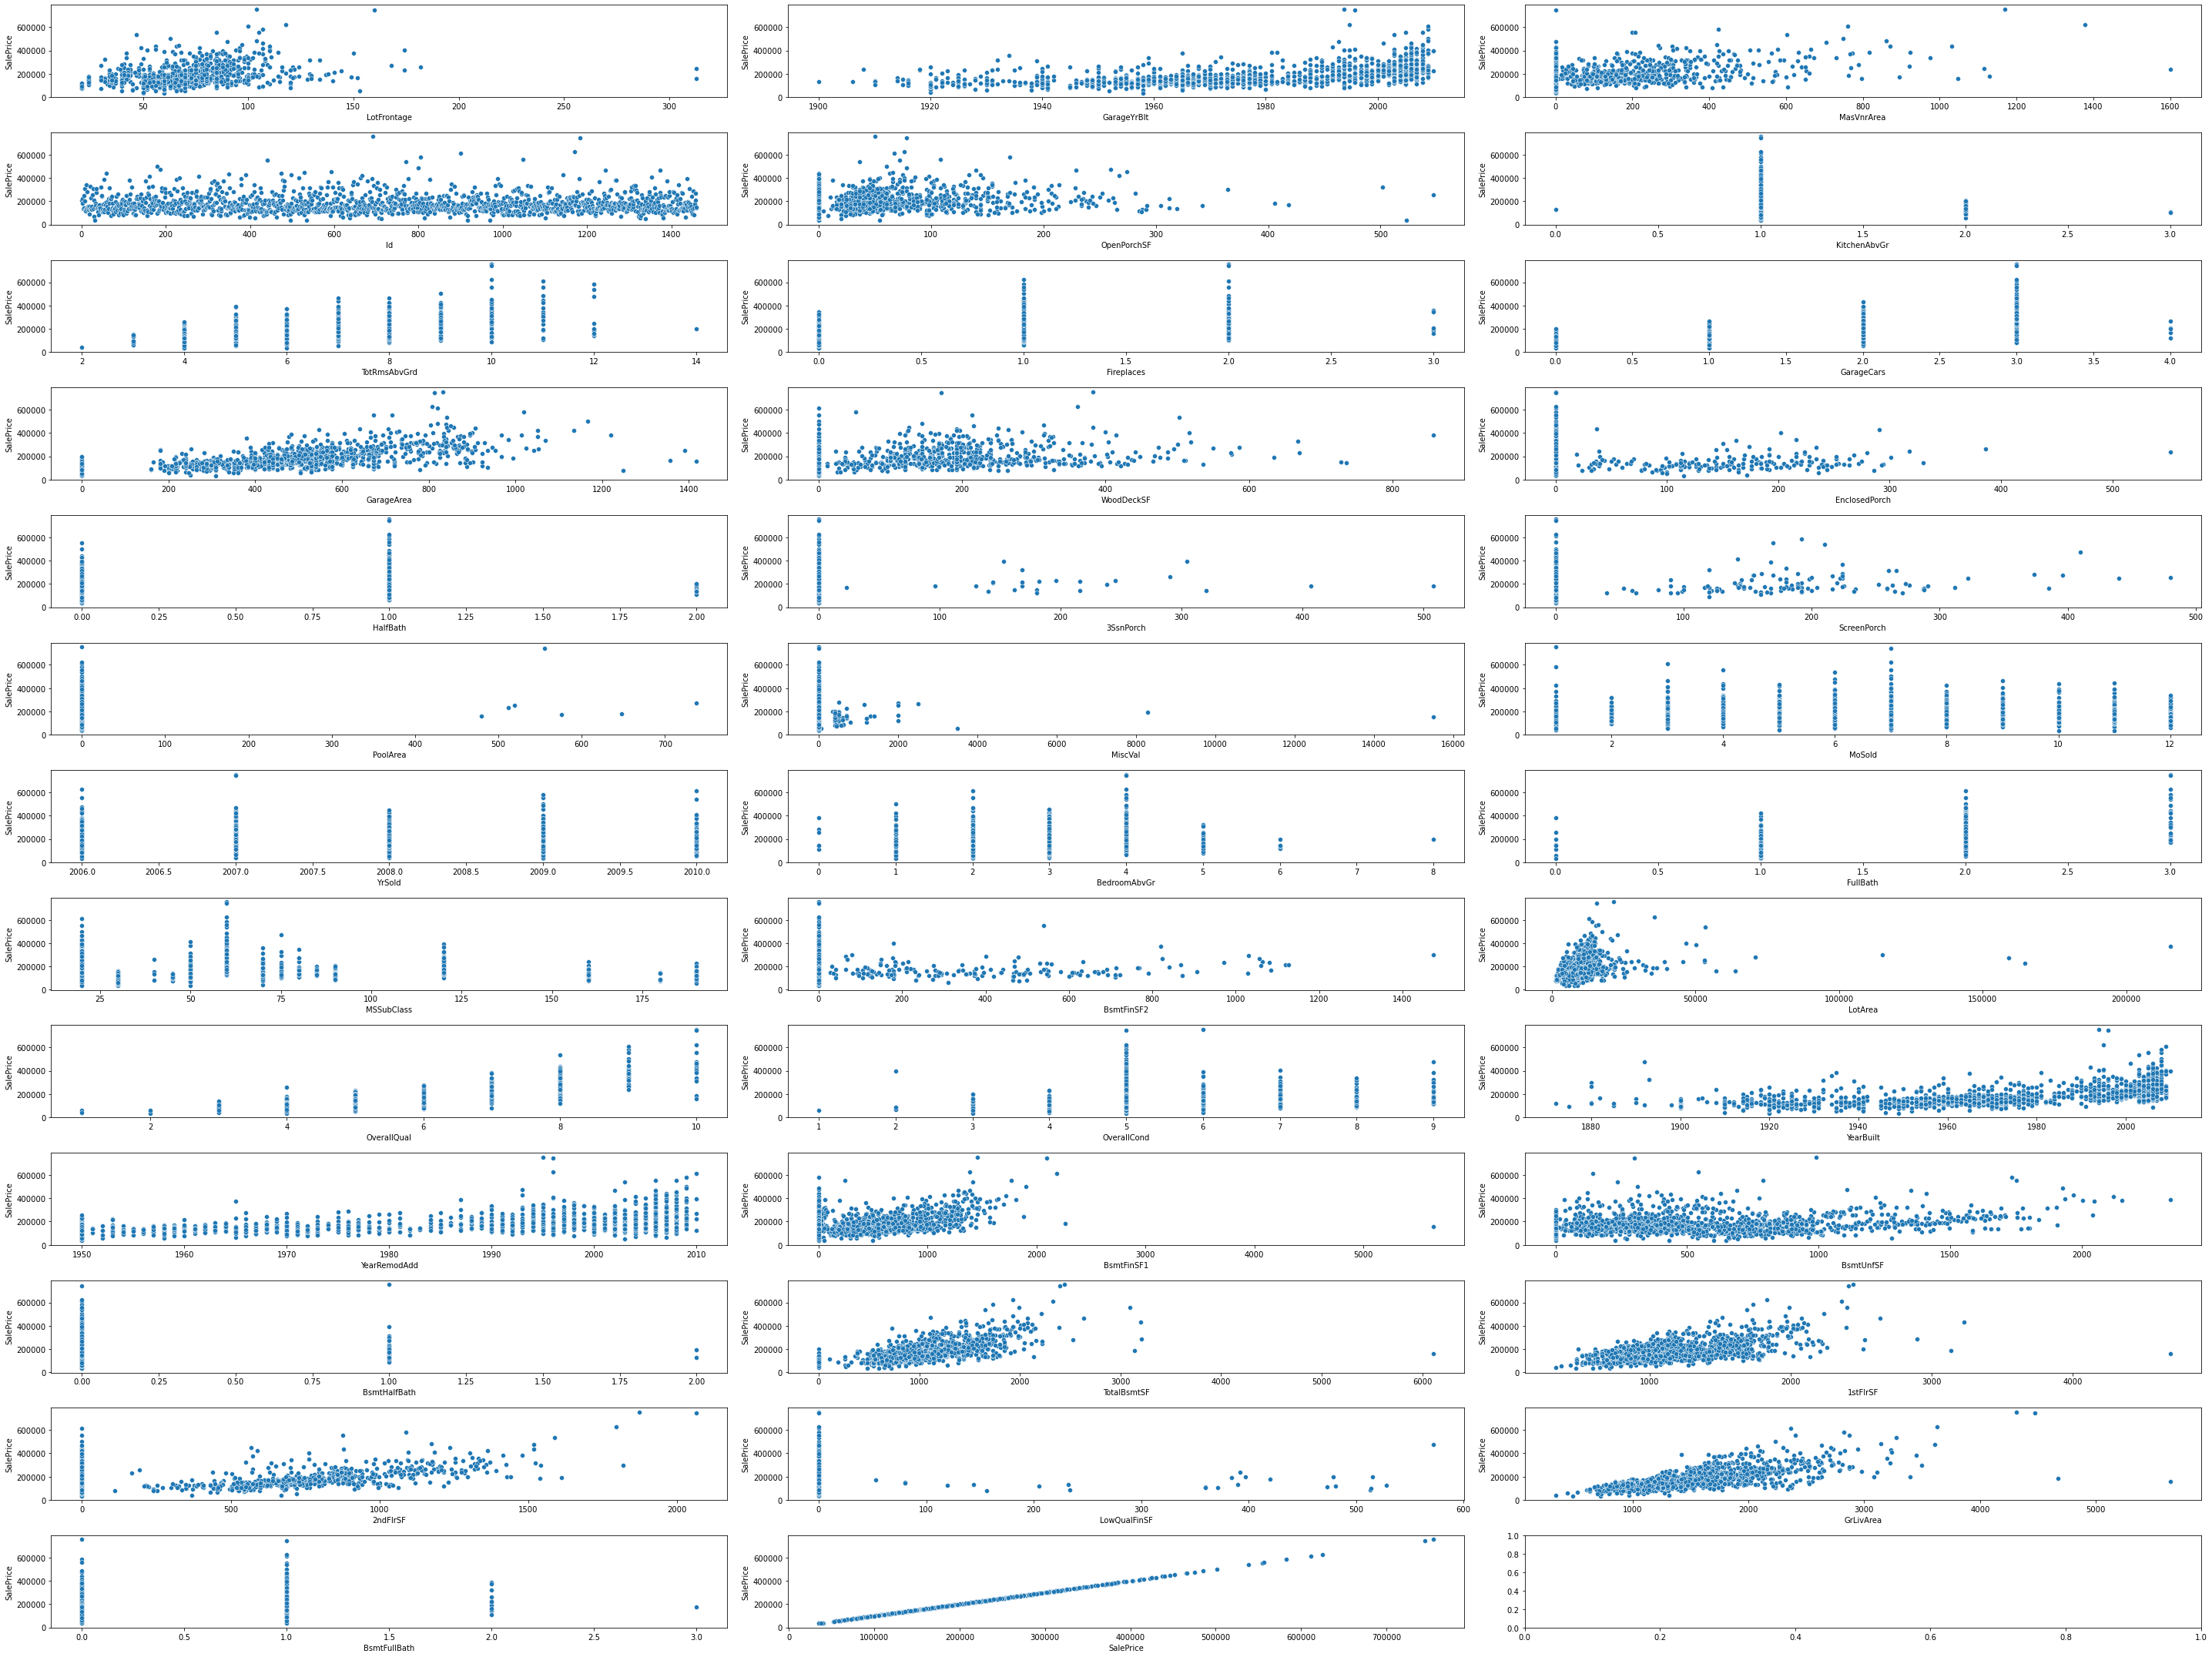

In [15]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = round(len(num_columns['name'].unique()) // num_cols) + 1 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 30))

for i, feature in enumerate(num_columns['name']):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    sns.scatterplot(data=data, x= feature, y='SalePrice', ax =ax)
    plt.tight_layout()

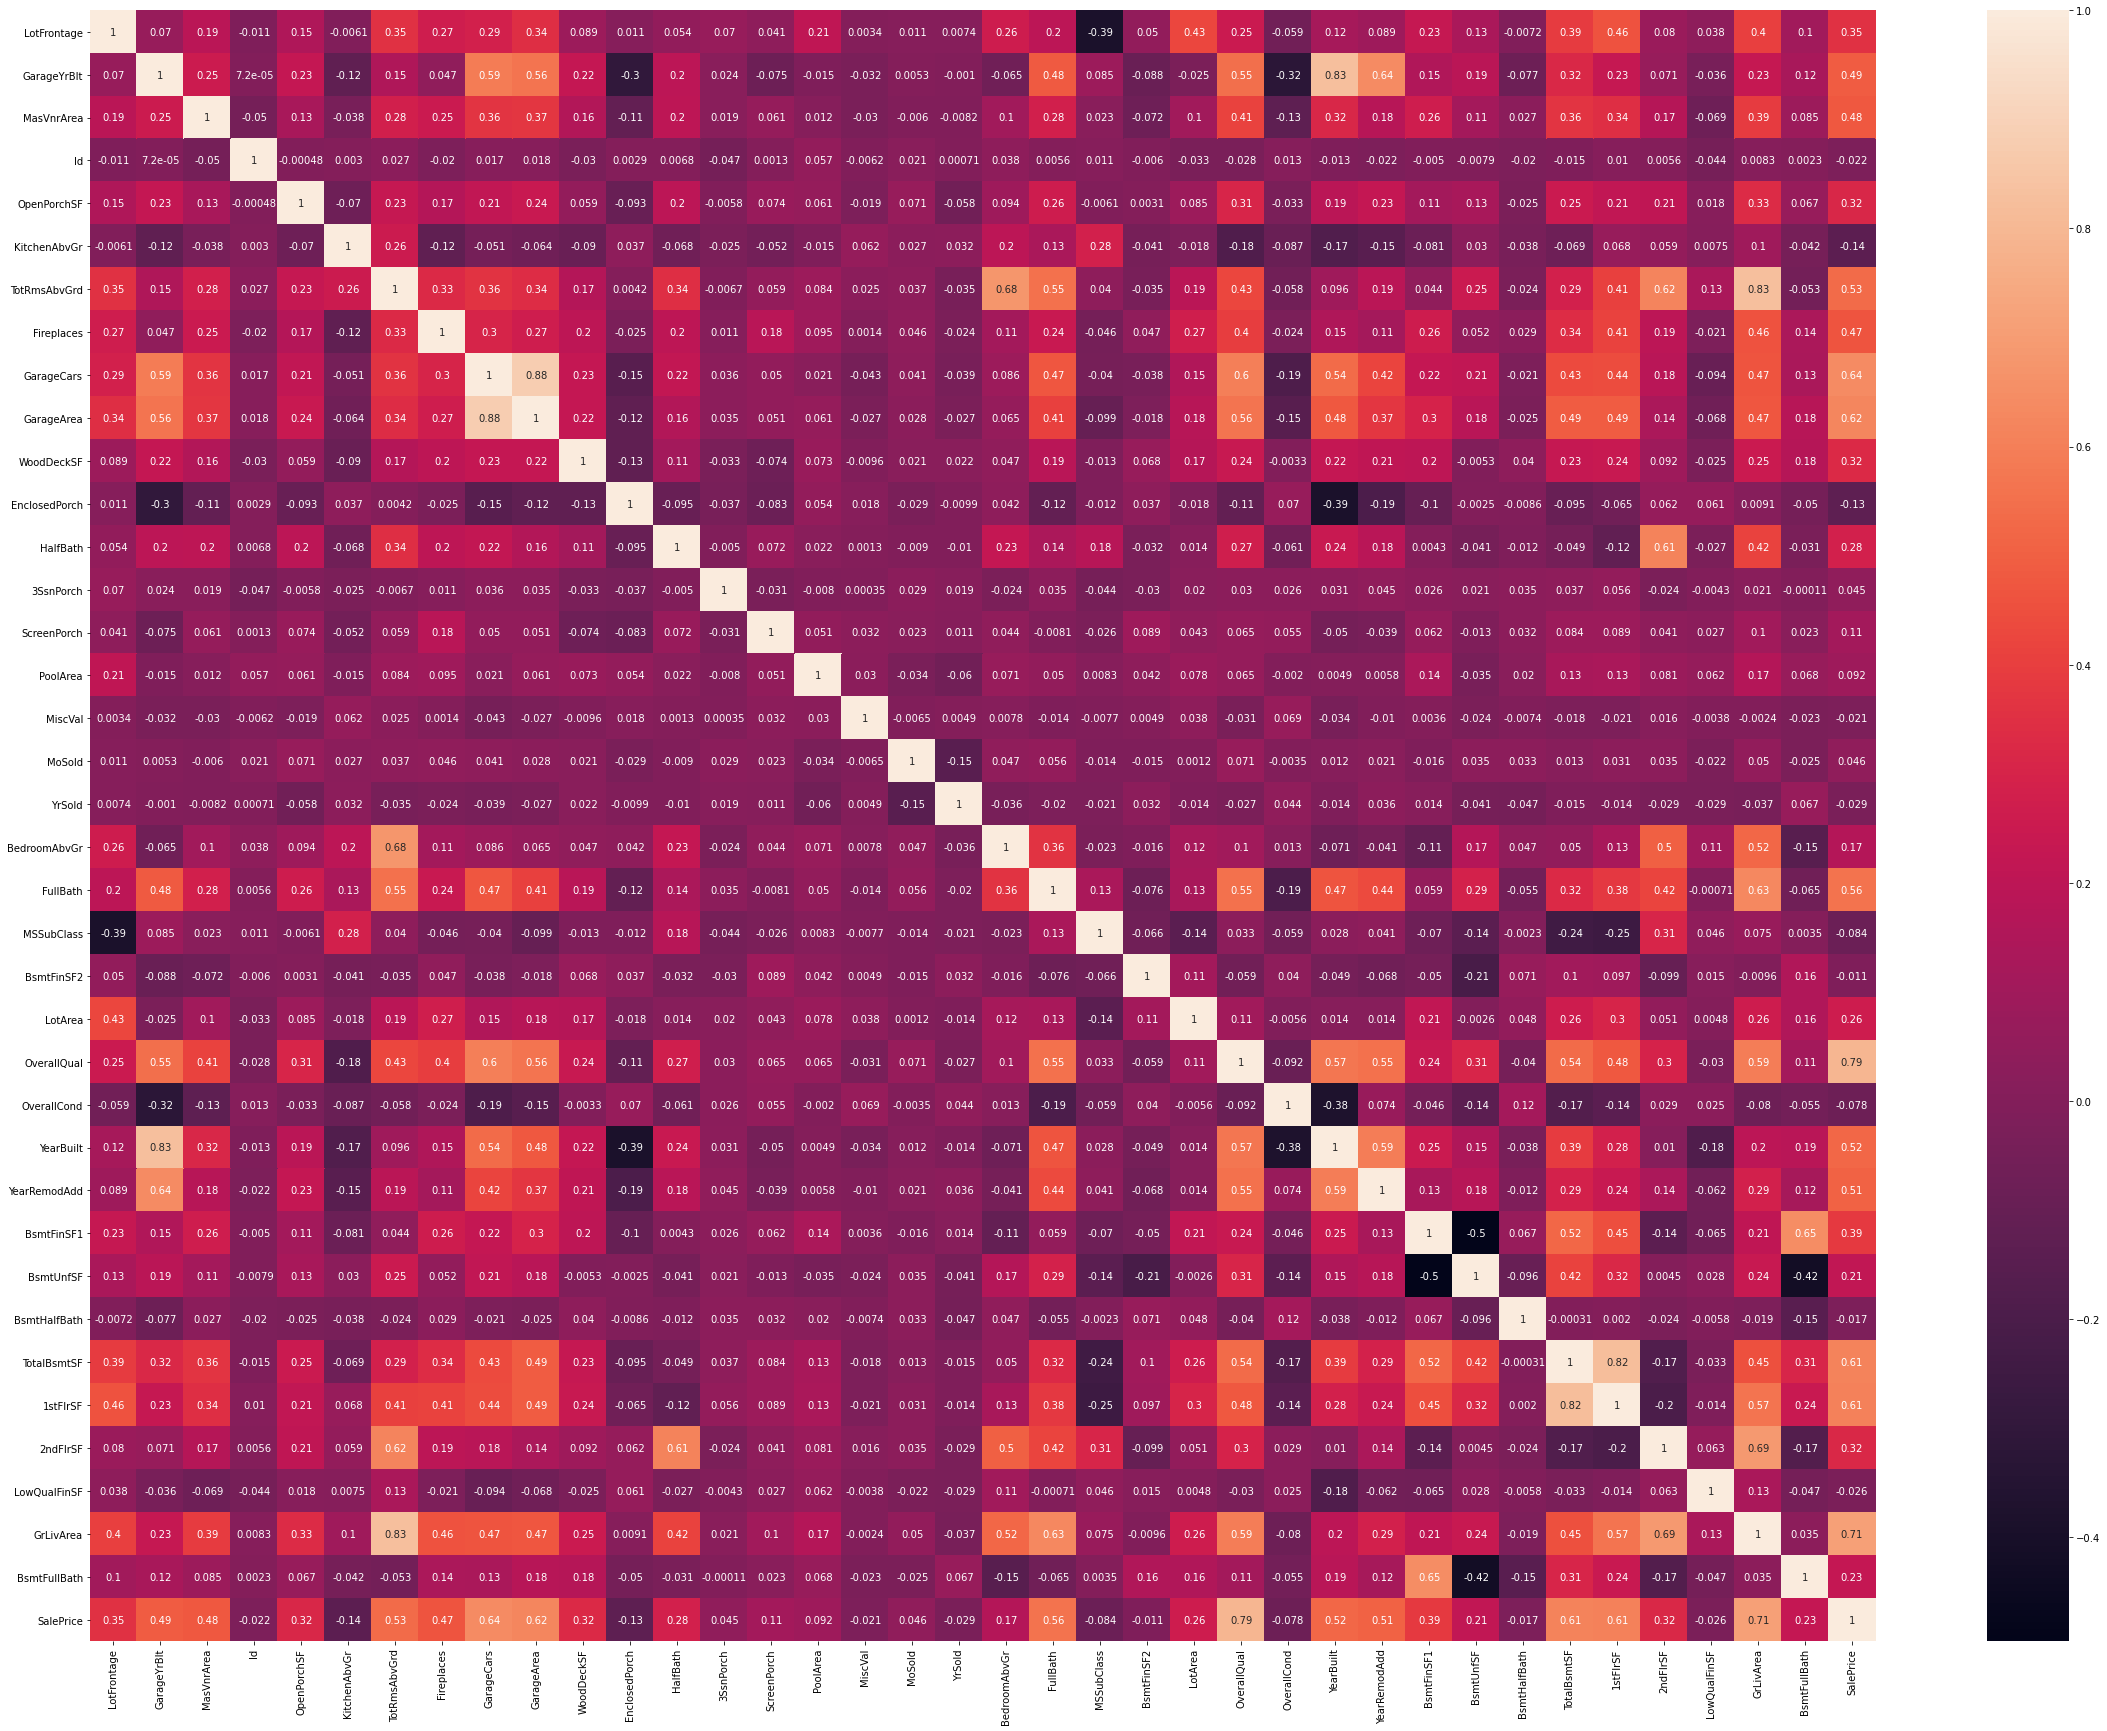

In [16]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(40,30))
corr_matrix = data[num_columns['name'].unique()].corr()

# heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

- Column which are highly coorelated with SalePrice
     - OverallQual
     - YearBuilt
     - YearRemodAdd
     - TotalBsmtSF
     - 1stFlrSF
     - GrLivArea
     - FullBath
     - TotRmsAbvGrd
     - GarageCars
     - GarageArea

In [17]:
#list of columns for which more the 50% of data is null or na or blank
percentage_null = (data.isnull().sum() / len(data))

print("Percentage of null or empty values in numerical columns:")
print(percentage_null[percentage_null >= 0.5].sort_values(ascending=False))

Percentage of null or empty values in numerical columns:
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
dtype: float64


In [18]:
#list of categorical columns for which one category as dominating
for col in data.select_dtypes(include='object'):
    max_value = round(data[col].value_counts(normalize=True).max(), 3)
    if max_value > 0.95:
        print(col, max_value)


Street 0.996
Utilities 0.999
Condition2 0.99
RoofMatl 0.982
Heating 0.978
GarageQual 0.951
GarageCond 0.962


### Observations

 - Below numerical columns and percent of missing value 
     - LotFrontage :0.177397
     - GarageYrBlt :0.055479
     - MasVnrArea  :0.005479

 - Below categorical columns has one highly dominating column(more then 95% of data belongs to one category)
      - Street     : 0.996
      - Utilities  : 0.999
      - Condition2 : 0.99
      - RoofMatl   : 0.982
      - Heating    : 0.978
      - GarageQual : 0.951
      - GarageCond : 0.962
     

     

 


### Step 2: Data Cleaning

- Replace NaN with Not Applicable for columns where null is allowed
- Converting the year related features into number of years
- Remove highly coorelated columns
- Remove column which does not have any significance in predictions
- Remove column which has one category has highly dominating

In [19]:
#Replace NaN with Not Applicable for columns where null is allowed

nulls_allowed = ['Alley','MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
data[nulls_allowed] = data[nulls_allowed].fillna(value='not_applicable', axis=1)

In [20]:
# Converting the year related features into no. of years
for col in ['YearBuilt','YearRemodAdd', 'YrSold']:
    data[col] = 2024 - data[col]

In [21]:

print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in data.columns:
    if data[feat].isnull().any():
        print(feat, ' : ',  round(data[feat].isnull().sum()/data.shape[0], 6)*100)

Feature : Percentage of Missing Value
LotFrontage  :  17.7397
MasVnrArea  :  0.5479
Electrical  :  0.06849999999999999
GarageYrBlt  :  5.5479
GarageQual  :  5.5479


In [22]:
#dropping the rows for which MasVnrArea as it only drop 1% of records
data = data[~data['MasVnrArea'].isnull()]
data = data[~data['Electrical'].isnull()]


In [23]:
# drop columns which are highly coorelated, no business use case, has highly dominating category
col_to_drop = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'Id', 'MoSold', 'PoolQC', 'MiscFeature', 'Alley']
dominating_class_percent = { col: data[col].value_counts(normalize=True).max() for col in data.select_dtypes(include=['object'])  }

# dropping the columns which has more then 90% of data belonging to one category
col_to_drop.extend([key for key in dominating_class_percent if dominating_class_percent[key] > 0.95])


clean_data = data.drop(col_to_drop, axis=1)

#### Outlier Detection
- Checking percentage of outliers for all the numerical columns

In [24]:
outliers_percentage={}
numeric_df = clean_data.select_dtypes(include=['int', 'float'])
for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
1,MasVnrArea,6.62
0,LotFrontage,6.06


- Majority of the numeric features have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [25]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = clean_data[feature].quantile(.75) - clean_data[feature].quantile(.25) 
        max_value = clean_data[feature].quantile(.75)+1.5*IQR
        min_value = clean_data[feature].quantile(.25)-1.5*IQR
        clean_data[feature][clean_data[feature] > max_value] = max_value
        clean_data[feature][clean_data[feature] < min_value ] = min_value

### Step 3: Data Preparation
 - Scaling
 - dummy variable
 - Train Test Split
 - Impute LotFrontage 

In [26]:
X = clean_data.drop(['SalePrice'], axis=1)
y = clean_data['SalePrice']


In [27]:
#  creating dummy variable
categorical_columns = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical_columns, drop_first=True, dtype='int')


# drop categorical variables 
X = X.drop(list(categorical_columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)


In [28]:
ss = StandardScaler()
ss.fit(X)

X_scaled = pd.DataFrame(data=ss.transform(X), columns=X.columns)

X_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.451000e+03,1.194000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,...,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03
mean,-6.916896e-17,-1.934057e-16,-1.202375e-16,-2.068948e-16,9.082252e-17,-5.499468e-17,-1.097216e-16,1.944994e-16,-2.241870e-17,6.794473e-17,...,1.378511e-15,-1.711052e-17,-4.376620e-16,5.757417e-16,6.572582e-17,-5.551211e-16,-1.314134e-17,-2.695218e-17,1.828693e-17,-4.126418e-16
std,1.000345e+00,1.000419e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,...,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00
min,-8.723864e-01,-2.118463e+00,-9.217447e-01,-3.688460e+00,-4.114528e+00,-1.289192e+00,-1.222610e+00,-6.690239e-01,-9.715795e-01,-2.896215e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,-2.576207e+00,-5.257699e-02,-8.740074e-02,-1.182212e-01,-2.150356e+00,-3.029824e-01
25%,-8.723864e-01,-5.146160e-01,-2.973418e-01,-7.919883e-01,-5.207401e-01,-9.578457e-01,-9.319721e-01,-6.690239e-01,-9.715795e-01,-2.896215e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
50%,-1.637658e-01,-5.458307e-03,-1.031887e-01,-6.787046e-02,-5.207401e-01,-3.007469e-02,-3.991352e-01,-6.690239e-01,-1.346075e-01,-2.896215e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
75%,3.086480e-01,5.546152e-01,1.093335e-01,6.562474e-01,3.777069e-01,5.663495e-01,9.087371e-01,5.614766e-01,5.815418e-01,-2.896215e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
max,3.143131e+00,2.158462e+00,2.049515e+01,2.828601e+00,3.073048e+00,3.283393e+00,1.683773e+00,2.407227e+00,1.142703e+01,8.824809e+00,...,1.700588e+01,1.700588e+01,3.345636e+00,2.196968e+01,3.881676e-01,1.901973e+01,1.144155e+01,8.458723e+00,4.650393e-01,3.300522e+00


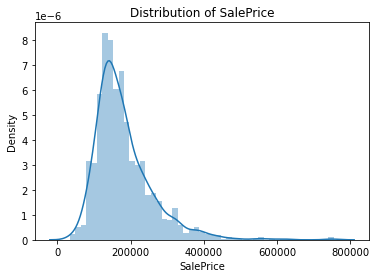

In [29]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(data['SalePrice'])
plt.show()

Text(0.5, 1.0, 'Distribution of log transformed SalePrice')

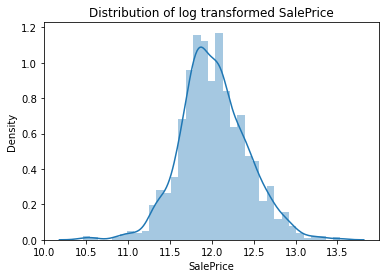

In [30]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(data['SalePrice'])
sns.distplot(np.log(data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')

In [31]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [32]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

len(X_train.columns)

219

### Step 4: Model Building and Evaluation

### **Linear Regression**

In [33]:
top_n_cols = list()
n =  50# after multiple attempt 40 gives better R2 value for train and test

linear_m = LinearRegression()
linear_m.fit(X_train, y_train)
rfe = RFE(linear_m, n_features_to_select=n)
rfe = rfe.fit(X_train, y_train)
    

rfe_ranking = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
for i in rfe_ranking:
    if i[1]:
        top_n_cols.append(i[0])
print("Top %d features : " %len(top_n_cols))
print(top_n_cols)

Top 50 features : 
['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_not_applicable', 'BsmtCond_Po', 'BsmtCond_not_applicable', 'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'BsmtFinType1_not_applicable', 'Electrical_Mix', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [34]:
X_train_rfe = sm.add_constant(X_train[top_n_cols], has_constant='add')
X_test_rfe = sm.add_constant(X_test[top_n_cols], has_constant='add')
len(X_train_rfe.columns)

51

In [35]:
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_rfe).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:46:53   Log-Likelihood:                 635.23
No. Observations:                1015   AIC:                            -1182.
Df Residuals:                     971   BIC:                            -965.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [36]:

y_pred_train = lin_reg.predict(X_train_rfe)
y_pred_test = lin_reg.predict(X_test_rfe)


metric_lr = {'Algo Type': 'Linear Regression'}

# R2 Score
r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)

metric_lr['R2 Score(Train)'] = r2_train_lr
metric_lr['R2 Score(Test)'] = r2_test_lr

# RSS
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss1_lr = np.sum(np.square(y_test - y_pred_test))

metric_lr['RSS (Train)'] = r2_train_lr
metric_lr['RSS (Test)'] = r2_test_lr


# RMSE Error
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric_lr['RMSE (Train)'] = mse_train_lr**0.5
metric_lr['RMSE (Test)'] = mse_test_lr**0.5

for key, value in metric_lr.items():
    print(f"{key} : {value}")

Algo Type : Linear Regression
R2 Score(Train) : 0.8954841547989315
R2 Score(Test) : -3.4296832114024856
RSS (Train) : 0.8954841547989315
RSS (Test) : -3.4296832114024856
RMSE (Train) : 0.12940808344138355
RMSE (Test) : 0.8355733858361399


## Ridge

In [37]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_rfe, y_train) 
final_model_ridge  = model_cv_ridge.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


In [38]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 20}


In [39]:
y_pred_train_ridge = final_model_ridge.predict(X_train_rfe)
y_pred_test_ridge = final_model_ridge.predict(X_test_rfe)

metric_rg = {'Algo Type': 'Ridge'}

# R2 Score
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

metric_rg['R2 Score(Train)'] = r2_train_ridge
metric_rg['R2 Score(Test)'] = r2_test_ridge

# RSS
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))

metric_rg['RSS (Train)'] = rss_train_ridge
metric_rg['RSS (Test)'] = rss_test_ridge

# Mean Square Error
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

metric_rg['RMSE (Train)'] = mse_train_ridge**0.5
metric_rg['RMSE (Test)'] = mse_test_ridge**0.5



In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train_rfe, y_train) 
final_model_lasso  = model_cv_lasso.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


In [41]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [42]:
y_pred_train_lasso = final_model_lasso.predict(X_train_rfe)
y_pred_test_lasso = final_model_lasso.predict(X_test_rfe)


metric_ls = {'Algo Type': 'Lasson'}

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

metric_ls['R2 Score(Train)'] = r2_train_ridge
metric_ls['R2 Score(Test)'] = r2_test_ridge



rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))

metric_ls['RSS (Train)'] = rss_train_lasso
metric_ls['RSS (Test)'] = rss_test_lasso

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)


metric_ls['RMSE (Train)'] = mse_train_lasso**0.5
metric_ls['RMSE (Test)'] = mse_test_lasso**0.5

In [43]:
# Creating a table which contain all the metrics
lr_table = [ 
            metric_lr, 
            metric_rg, 
            metric_ls]

final_metric = pd.DataFrame(lr_table)

final_metric

,Algo Type,R2 Score(Train),R2 Score(Test),RSS (Train),RSS (Test),RMSE (Train),RMSE (Test)
0,Linear Regression,0.895484,-3.429683,0.895484,-3.429683,0.129408,0.835573
1,Ridge,0.892643,0.886539,17.459718,7.797040,0.131155,0.133728
2,Lasson,0.892643,0.886539,17.386179,7.638431,0.130879,0.132361


### Comparing Model Coefficients

In [44]:
pd.set_option('display.float_format', str)

model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0)'] = final_model_ridge.coef_
model_coefficients['Lasso (alpha=0.001)'] = final_model_lasso.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001)
const,0.0,0.0
LotFrontage,0.02250961395361832,0.021419750100533215
OverallQual,0.09137185404632948,0.09406210886674381
OverallCond,0.057039214849924934,0.057217676852493814
YearBuilt,-0.06698132329477431,-0.06731553703581522
BsmtFinSF1,-0.013537810641574164,-0.01458029156945027
BsmtFinSF2,-0.003108547713913797,-0.0030389121699711187
BsmtUnfSF,0.00410465312862957,0.0
TotalBsmtSF,-0.011080882260616494,-0.005769940121535469
GrLivArea,0.13229263375936914,0.13590114453183177


### Final Model

Lasso Regression produced same R2 score on test data but lesser RMSE value, than Ridge Regression. Hence, Choosing Lasso as the final model.

In [45]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)


,Lasso (alpha=0.001)
GrLivArea,0.13590114453183177
MSZoning_RL,0.11870692400233152
OverallQual,0.09406210886674381
MSZoning_RM,0.07991232991292666
MSZoning_FV,0.06772771186854319
OverallCond,0.057217676852493814
GarageArea,0.04314816955286138
BsmtFullBath,0.03492962237654584
Foundation_PConc,0.03161967798406538
MSZoning_RH,0.03049985965674278


In [46]:
# Top 10 predictors
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)[:10]


,Lasso (alpha=0.001)
GrLivArea,0.13590114453183177
MSZoning_RL,0.11870692400233152
OverallQual,0.09406210886674381
MSZoning_RM,0.07991232991292666
MSZoning_FV,0.06772771186854319
OverallCond,0.057217676852493814
GarageArea,0.04314816955286138
BsmtFullBath,0.03492962237654584
Foundation_PConc,0.03161967798406538
MSZoning_RH,0.03049985965674278


### Summary

1. **Top 50 columns for predictions :**['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm', 'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_not_applicable', 'BsmtCond_Po', 'BsmtCond_not_applicable', 'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'BsmtFinType1_not_applicable', 'Electrical_Mix', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
2. Model evaluation is done with R2 score and Root Mean Square Error.
3. Lasso Regression is chosen as final model for having less complexity.
4. Predicted value of SalePrice is tranformed into its original scale by performing antilog.

# Subjective Question

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?<br>
 - Optimal Value for Ridge: 20.0 <br>
 - Optimal Value for Lasso: 0.001

In [47]:
ridge_alpha = 40.0
ridge = Ridge(alpha=ridge_alpha)
         
ridge.fit(X_train_rfe, y_train) 
model_coefficients['Ridge (alpha=40.0)'] = ridge.coef_

y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)


In [48]:
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha=40.0)
const,0.0,0.0,0.0
LotFrontage,0.02250961395361832,0.021419750100533215,0.022505782306615832
OverallQual,0.09137185404632948,0.09406210886674381,0.0920836956655946
OverallCond,0.057039214849924934,0.057217676852493814,0.056153313731645414
YearBuilt,-0.06698132329477431,-0.06731553703581522,-0.06336625262887817
BsmtFinSF1,-0.013537810641574164,-0.01458029156945027,-0.010146799800068397
BsmtFinSF2,-0.003108547713913797,-0.0030389121699711187,-0.0021267389788756754
BsmtUnfSF,0.00410465312862957,0.0,0.005111253161533263
TotalBsmtSF,-0.011080882260616494,-0.005769940121535469,-0.006175532480963342
GrLivArea,0.13229263375936914,0.13590114453183177,0.12373409295981273


In [49]:
lasso_alpha = 0.002

lasso = Lasso(alpha=lasso_alpha)
         
lasso.fit(X_train_rfe, y_train) 
model_coefficients['Lasso (alpha=0.002)'] = lasso.coef_

y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)


In [50]:
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha=40.0),Lasso (alpha=0.002)
const,0.0,0.0,0.0,0.0
LotFrontage,0.02250961395361832,0.021419750100533215,0.022505782306615832,0.020287221434282965
OverallQual,0.09137185404632948,0.09406210886674381,0.0920836956655946,0.09985847950401355
OverallCond,0.057039214849924934,0.057217676852493814,0.056153313731645414,0.0577299479658135
YearBuilt,-0.06698132329477431,-0.06731553703581522,-0.06336625262887817,-0.06588662535950013
BsmtFinSF1,-0.013537810641574164,-0.01458029156945027,-0.010146799800068397,-0.007630144211596409
BsmtFinSF2,-0.003108547713913797,-0.0030389121699711187,-0.0021267389788756754,-0.0
BsmtUnfSF,0.00410465312862957,0.0,0.005111253161533263,0.0
TotalBsmtSF,-0.011080882260616494,-0.005769940121535469,-0.006175532480963342,-0.0
GrLivArea,0.13229263375936914,0.13590114453183177,0.12373409295981273,0.1295476168551743


In [51]:
# Top 10 feature
model_coefficients[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False)[:10]

,Lasso (alpha=0.002)
GrLivArea,0.1295476168551743
OverallQual,0.09985847950401355
OverallCond,0.0577299479658135
GarageArea,0.040826788864928534
MSZoning_RL,0.0405256498180674
BsmtFullBath,0.03234490920969306
Foundation_PConc,0.030593820566961288
SaleType_New,0.029049451670817857
MSZoning_FV,0.027110501366675945
Neighborhood_NridgHt,0.026670850940743326


#### we observe that it imposes a stronger penalty on the coefficients.
- In Ridge regression, raising the alpha results in smaller coefficient values without completely removing any coefficients.
- In Lasso regression, increasing the alpha can cause certain coefficients to become zero, effectively removing the corresponding features from the model.


Drop top 5 feature and rebuild the model

In [52]:
X_test_new = X_test_rfe.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'GarageArea', 'MSZoning_RL' ], axis=1)
X_train_new = X_train_rfe.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'GarageArea', 'MSZoning_RL'], axis=1)


In [53]:
lasso_alpha = 0.001

lasso = Lasso(alpha=lasso_alpha)
         
lasso.fit(X_train_new, y_train) 


coef_df = pd.DataFrame(index=X_test_new.columns)
coef_df.rows = X_test_new.columns
coef_df['Lasso'] = lasso.coef_
coef_df.sort_values(by='Lasso', ascending=False).head(5)


,Lasso
TotalBsmtSF,0.07798200871262419
Fireplaces,0.07533535222726824
BedroomAbvGr,0.06854225048590654
HouseStyle_2Story,0.04809349453239714
Foundation_PConc,0.04776511940896496
